In [1]:
%matplotlib inline
# NB: per eseguire questo notebook come file Python, commentare l'istruzione "%matplotlib inline" qui sopra e scegliere il menù "File -> Download as -> Python (.py)"
import numpy as np
from math import *
import matplotlib.pyplot as plt
from sistema_meccanico_3gdl import *
from nonlinear_LS import *

M1 =  27.0
M2 =  120.0
M3 =  11246.0
K1 =  180000000.0
K2 =  60000000.0
K3 =  120000000.0
C1 =  50000.0
C2 =  46000.0
C3 =  240000.0
coordinate di partenza: y1=0.06, y2=0.06, y3=0.05


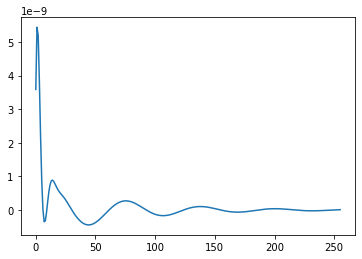

In [2]:
A,B,C,D = build_sistema_meccanico_3gdl()
N = 256
u = np.zeros(N); u[0] = 1.0 #creo la sequenza delta
Ts = 0.001
y_meas, _ = simula_sistema_meccanico_3gdl(A, B, C, D, u, Ts) 
plt.figure(1); plt.plot(y_meas[0,:].T); plt.show()

In [3]:
def y_param(theta):
    A,B,C,D = build_sistema_meccanico_3gdl(M1_stimato=theta[0])
    Ts = 0.001
    u = np.zeros(N); u[0] = 1.0
    risposta,_ = simula_sistema_meccanico_3gdl(A, B, C, D, u, Ts)
    return risposta

Prima di tutto proviamo stimando solo il parametro M1

In [4]:
theta_est_iniziale = [100.0]

*******************************************************
metodo_stima =  GN


opzione_solve =  LS
-------------------------------------------------------
start:  theta_est =  [100.0] FN =  9.11905481419882e-18
psi has a condition number of  1.0
mu =  1.0 temp_FN =  1.1638206279531706e-20
iterazione  1 :  theta_est =  [29.26022402]    FN =  1.1638206279531706e-20
psi has a condition number of  1.0
mu =  1.0 temp_FN =  2.0471219793660619e-25
iterazione  2 :  theta_est =  [26.99056278]    FN =  2.0471219793660619e-25
psi has a condition number of  1.0
mu =  1.0 temp_FN =  2.9924136510916677e-31
iterazione  3 :  theta_est =  [26.99999985]    FN =  2.9924136510916677e-31


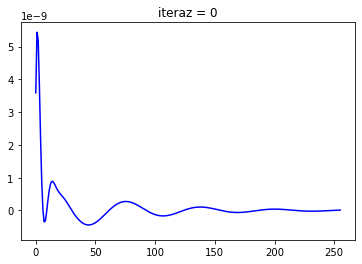

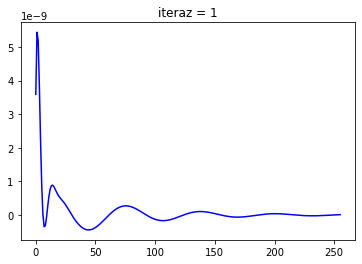

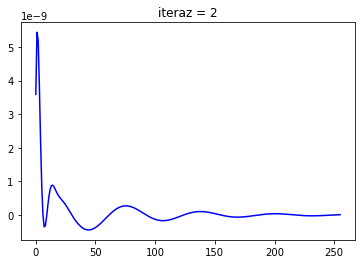

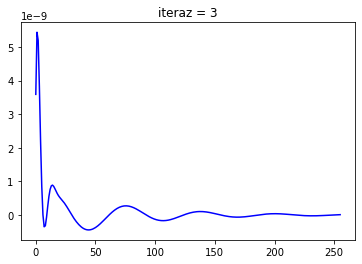

In [5]:
E = GN_LM(y_meas[0,:],y_param,theta_est_iniziale) #questa funzione la trovi in nonlinear_LS.py

In [6]:
print(E[0,:]) #la stima iniziale
print(E[-1,:]) #il parametro stimato

[100.]
[26.99999985]


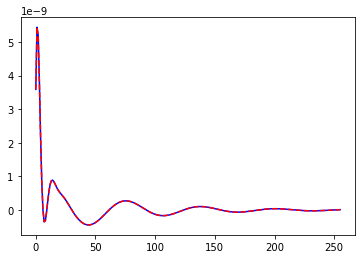

In [7]:
plt.figure(2) 
plt.plot(y_meas[0,:].T,'b')
plt.plot(y_param(E[-1,:])[0,:],'r--') #l'uotput del sistema è perfetto, la risposta del sistema al parametro stimato è perfetta
plt.show()

ho provato due casi: 
1. la stima di M1, M2 e K1
2. la stima di M3, K1, C1 e C2

In [8]:
esempio=2

if esempio==1:
    theta_est_iniziale = [100.0,200.0,150000.0]
else:
    theta_est_iniziale = [9000.0,200000.0,8000.0,7000.0]
    
    
def y_param(theta):
    if len(theta)==3:
        A,B,C,D = build_sistema_meccanico_3gdl(M1_stimato=theta[0],M2_stimato=theta[1],K1_stimato=theta[2])
    else:
        A,B,C,D = build_sistema_meccanico_3gdl(M3_stimato=theta[0],K1_stimato=theta[1],C1_stimato=theta[2],C2_stimato=theta[3])
    Ts = 0.001
    u = np.zeros(N); u[0] = 1.0
    risposta,_ = simula_sistema_meccanico_3gdl(A, B, C, D, u, Ts)
    return risposta

*******************************************************
metodo_stima =  GN


opzione_solve =  LS
-------------------------------------------------------
start:  theta_est =  [9000.0, 200000.0, 8000.0, 7000.0] FN =  2.6154263685260198e-17
psi has a condition number of  31.562564514088077
mu =  1.0 temp_FN =  8.022279951549685e-18
iterazione  1 :  theta_est =  [ 10862.0927454  208379.18724341  14993.57866575  -5833.25796999]    FN =  8.022279951549685e-18
psi has a condition number of  30.55073845380425
mu =  1.0 temp_FN =  4.9307772104027555e-18
iterazione  2 :  theta_est =  [ 11322.69897667 253726.95141121  30824.16803498  30406.14170507]    FN =  4.9307772104027555e-18
psi has a condition number of  36.662019962150154
mu =  1.0 temp_FN =  3.4820646388926755e-18
iterazione  3 :  theta_est =  [ 11301.29826639 210509.27135971  74501.12621997  59253.43812909]    FN =  3.4820646388926755e-18
psi has a condition number of  104.98613208526751
mu =  1.0 temp_FN =  8.121616337903803e-19
iteraz

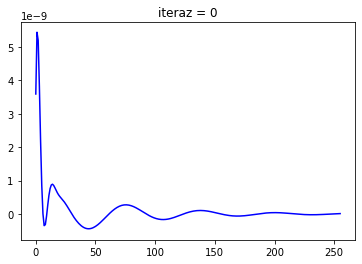

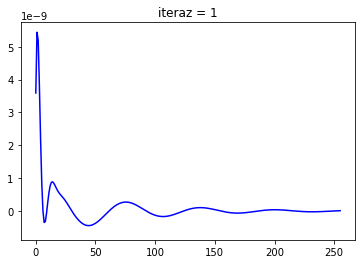

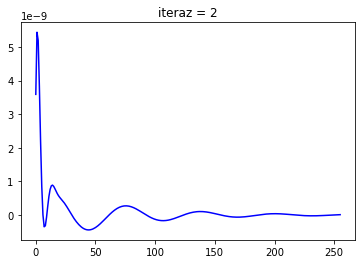

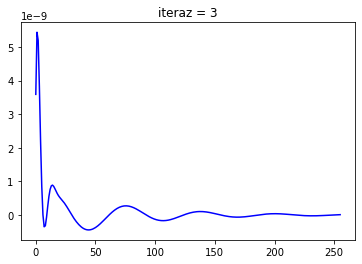

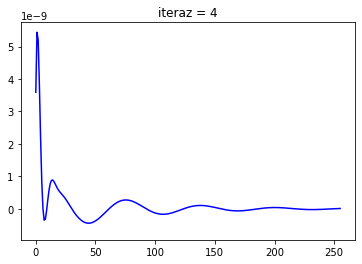

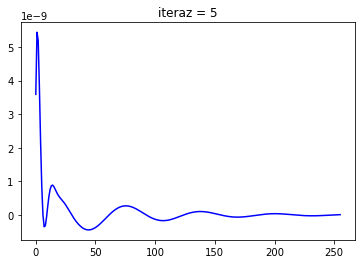

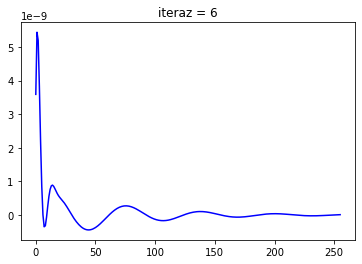

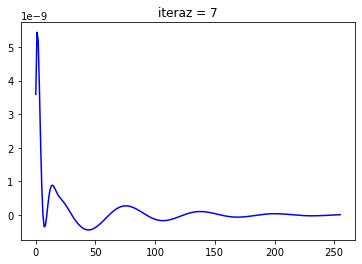

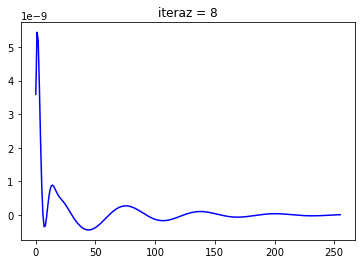

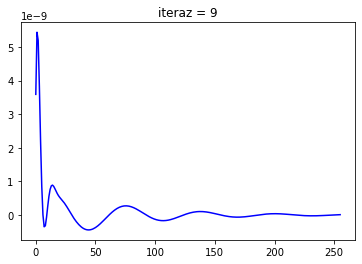

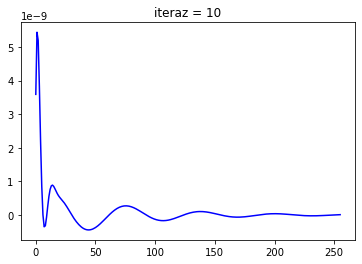

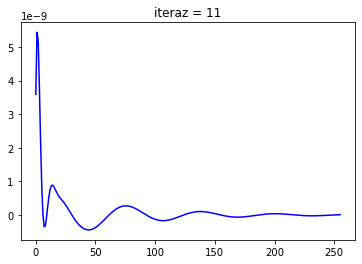

In [9]:
E = GN_LM(y_meas[0,:],y_param,theta_est_iniziale,metodo_stima='GN') #questa funzione la trovi in nonlinear_LS.py

In [10]:
print(E[0,:])
print(E[-1,:])

[  9000. 200000.   8000.   7000.]
[ 11192.6426953   83514.05169184 184389.46480575  38132.21134679]


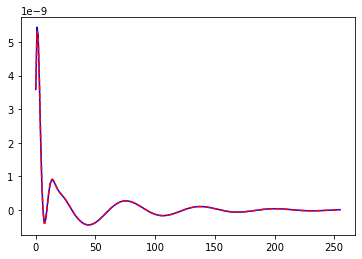

In [11]:
plt.figure(2) 
plt.plot(y_meas[0,:].T,'b')
plt.plot(y_param(E[-1,:])[0,:],'r--') #nonostante i parametri non siano così corretti la risposta del sistema è ottima
plt.show()